# Targets
- Hydrophobicity (HIC)
- Polyreactivity (CHO)
- Self association (AC-SINS at pH 7.4)
- Thermostability (Tm2)
- Titer

# Exploration

In [1]:
import pandas as pd
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import utils

In [2]:
dataset_path = "GDPa1/GDPa1_v1.2_20250814.csv"
df = pd.read_csv(dataset_path)
df.columns
df

,antibody_id,antibody_name,Titer,Purity,SEC %Monomer,SMAC,HIC,HAC,PR_CHO,PR_Ova,...,hc_protein_sequence,hc_dna_sequence,vl_protein_sequence,lc_protein_sequence,lc_dna_sequence,hierarchical_cluster_fold,random_fold,hierarchical_cluster_IgG_isotype_stratified_fold,light_aligned_aho,heavy_aligned_aho
0,GDPa1-001,abagovomab,140.25,98.530,97.010,2.730,2.590,NaN,0.337837,0.263108,...,MRAWIFFLLCLAGRALAQVKLQESGAELARPGASVKLSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,MRAWIFFLLCLAGRALADIELTQSPASLSASVGETVTITCQASENI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,2,2,DIELTQSPASLSASVGETVTITCQAS--ENIY------SYLAWHQQ...,QVKLQES-GAELARPGASVKLSCKASG-YTFTN-----YWMQWVKQ...
1,GDPa1-002,abituzumab,193.31,99.825,97.620,2.745,2.545,3.690,0.205246,0.100155,...,MRAWIFFLLCLAGRALAQVQLQQSGGELAKPGASVKVSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,4,0,DIQMTQSPSSLSASVGDRVTITCRAS--QDIS------NYLAWYQQ...,QVQLQQS-GGELAKPGASVKVSCKASG-YTFSS-----FWMHWVRQ...
2,GDPa1-003,abrezekimab,114.75,98.350,89.055,2.740,2.705,NaN,0.138773,0.101180,...,MRAWIFFLLCLAGRALAQVTLKESGPVLVKPTETLTLTCTVSGFSL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCLASEDISNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCLASEDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,2,2,2,DIQMTQSPSSLSASVGDRVTITCLAS--EDIS------NYLAWYQQ...,QVTLKES-GPVLVKPTETLTLTCTVSG-FSLTN-----YHVQWIRQ...
3,GDPa1-004,abrilumab,327.32,98.575,98.605,2.715,2.565,1.005,0.000000,0.054971,...,MRAWIFFLLCLAGRALAQVQLVQSGAEVKKPGASVKVSCKVSGYTL...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSVSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,3,0,DIQMTQSPSSVSASVGDRVTITCRAS--QGIS------SWLAWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKVSG-YTLSD-----LSIHWVRQ...
4,GDPa1-005,adalimumab,313.39,99.300,96.120,2.705,2.495,NaN,0.183387,0.085628,...,MRAWIFFLLCLAGRALAEVQLVESGGGLVQPGRSLRLSCAASGFTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCRASQGI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,0,2,0,DIQMTQSPSSLSASVGDRVTITCRAS--QGIR------NYLAWYQQ...,EVQLVES-GGGLVQPGRSLRLSCAASG-FTFDD-----YAMHWVRQ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,GDPa1-242,visilizumab,303.51,94.700,98.110,2.745,2.495,4.270,0.337537,0.338022,...,MRAWIFFLLCLAGRALAQVQLVQSGAEVKKPGASVKVSCKASGYTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIQMTQSPSSLSASVGDRVTITCSASSSVSYMNWYQQKPGKAPKRL...,MRAWIFFLLCLAGRALADIQMTQSPSSLSASVGDRVTITCSASSSV...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,1,1,0,DIQMTQSPSSLSASVGDRVTITCSAS--SSVS-------YMNWYQQ...,QVQLVQS-GAEVKKPGASVKVSCKASG-YTFIS-----YTMHWVRQ...
242,GDPa1-243,xentuzumab,281.21,98.970,99.875,10.000,4.500,NaN,0.178788,0.117684,...,MRAWIFFLLCLAGRALAQVELVESGGGLVQPGGSLRLSCAASGFTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,DIVLTQPPSVSGAPGQRVTISCSGSSSNIGSNSVSWYQQLPGTAPK...,MRAWIFFLLCLAGRALADIVLTQPPSVSGAPGQRVTISCSGSSSNI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,4,4,4,DIVLTQP-PSVSGAPGQRVTISCSGSS-SNIGS-----NSVSWYQQ...,QVELVES-GGGLVQPGGSLRLSCAASG-FTFTS-----YWMSWVRQ...
243,GDPa1-244,zalutumumab,266.55,89.430,98.065,2.705,2.590,3.760,0.000000,0.018385,...,MRAWIFFLLCLAGRALAQVQLVESGGGVVQPGRSLRLSCAASGFTF...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,AIQLTQSPSSLSASVGDRVTITCRASQDISSALVWYQQKPGKAPKL...,MRAWIFFLLCLAGRALAAIQLTQSPSSLSASVGDRVTITCRASQDI...,GCCGCCACCATGAGAGCCTGGATCTTTTTCCTGCTGTGCCTGGCTG...,0,0,0,AIQLTQSPSSLSASVGDRVTITCRAS--QDIS------SALVWYQQ...,QVQLVES-GGGVVQPGRSLRLSCAASG-FTFST-----YGMHWVRQ...
244,GDPa1-245,zanolimumab,301.96,99.115,97.780,2.725,2.660,3.730,0.400486,0.100804,...,MRAWI

In [3]:
# dataset_path = "GDPa1/GDPa1_v1.2_20250814_full.xlsx"
# sheet_name="Assay Data - tidy format"
# df = pd.read_excel(dataset_path, sheet_name=sheet_name)
# df.columns
# df

In [14]:
# Put the labels at the front of the df to make splitting easier
label_cols = list(utils.csv_target_columns.values())
df = df[label_cols + [col for col in df.columns if col not in label_cols]]

# Split into X, Y
X = df.iloc[:, 5:]
Y = df.iloc[:, :5]

In [15]:
real_cols = ["Purity", "SEC %Monomer", "SMAC", "HAC", "PR_Ova", "AC-SINS_pH6.0", "Tonset", "Tm1"]
categ_cols = ["hc_subtype", "lc_subtype", "highest_clinical_trial_asof_feb2025", "est_status_asof_feb2025"]
seq_cols = ["vh_protein_sequence", "hc_protein_sequence", "hc_dna_sequence", "vl_protein_sequence", "lc_protein_sequence", "lc_dna_sequence"]
folds_cols = ["hierarchical_cluster_fold", "random_fold", "hierarchical_cluster_IgG_isotype_stratified_fold"]
align_cols = ["light_aligned_aho", "heavy_aligned_aho"]
id_cols = ["antibody_id", "antibody_name"]

assert len(real_cols + categ_cols + seq_cols + folds_cols + align_cols + id_cols) == len(X.columns)

# Visualise

## Predictors in $\R$

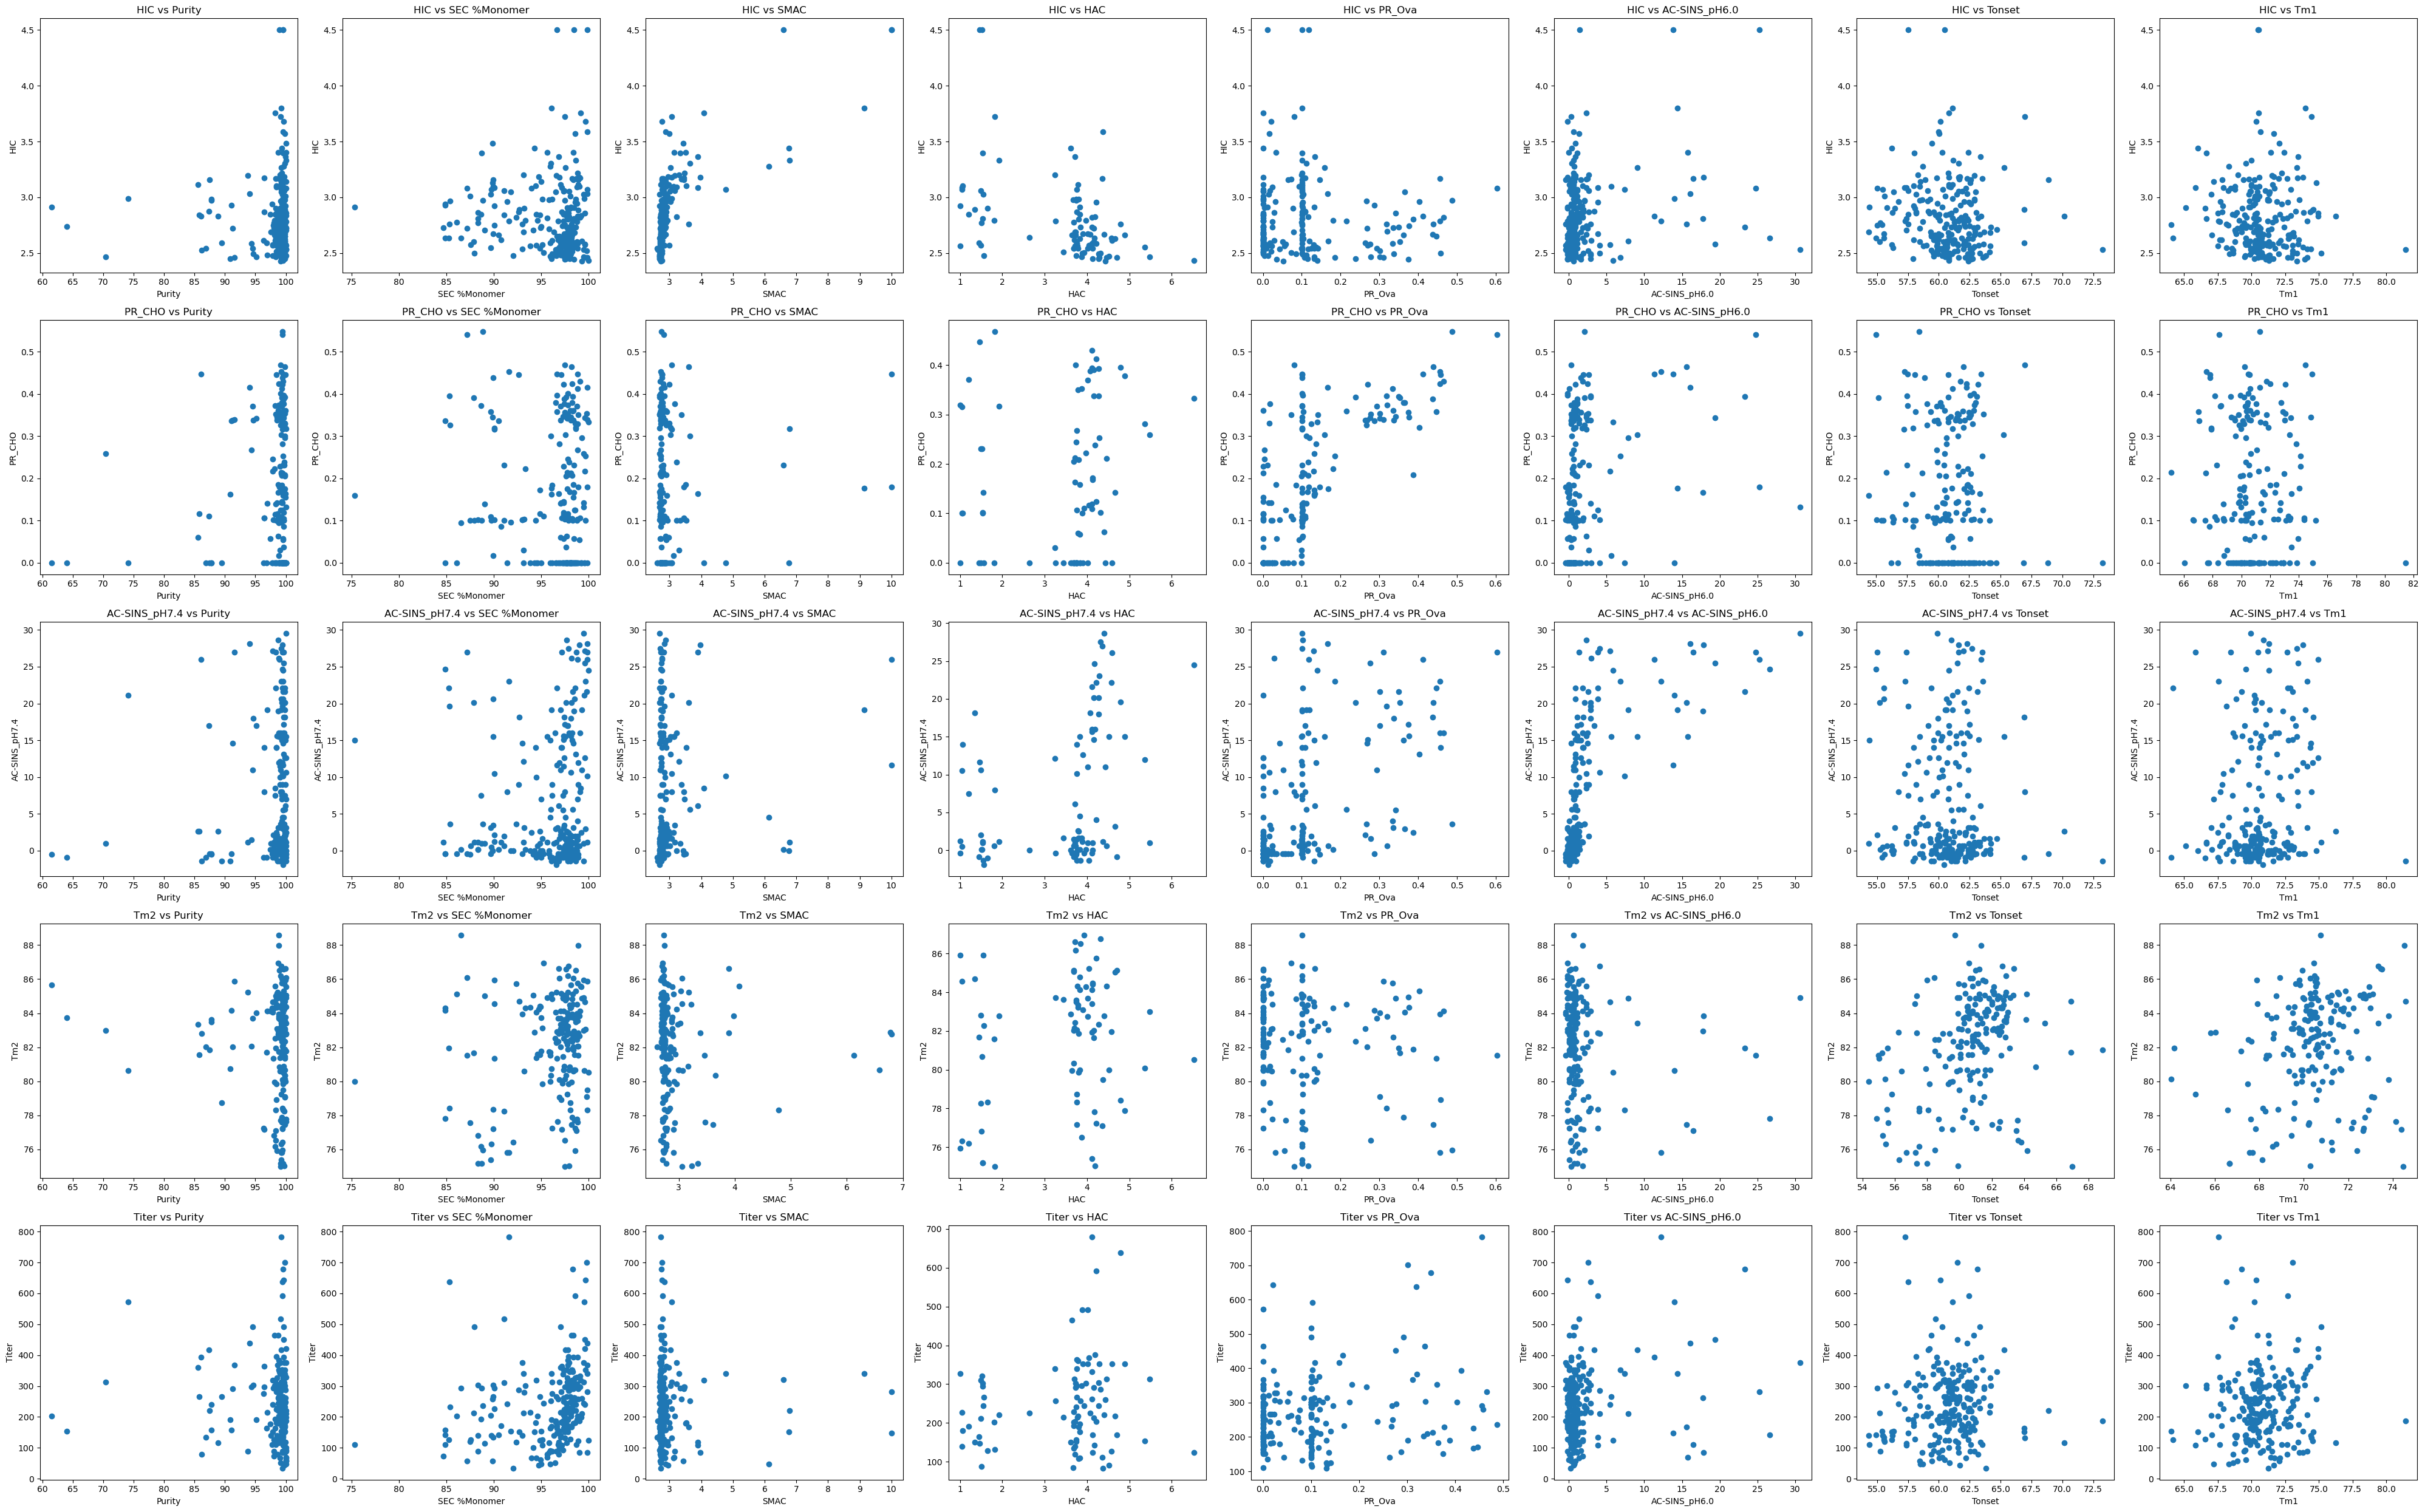

In [17]:
num_x_cols = len(real_cols)
num_y_cols = Y.shape[1]
fig, axes = plt.subplots(num_y_cols, num_x_cols, figsize=(5 * num_x_cols, 5 * num_y_cols))

for i, y_col in enumerate(Y.columns):
    for j, x_col in enumerate(real_cols):
        ax = axes[i, j]
        ax.scatter(X[x_col], Y[y_col])
        ax.set_title(f'{y_col} vs {x_col}')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)

plt.tight_layout()
plt.show()

# Prepare Data

In [ ]:
# Small dataset, every datapoint matters. Instead of discarding an entire row, train only using available label
X[(X["Tm2"].notna())  & (X["HIC"].notna()) & (X["Titer"].notna()) & (X["AC-SINS_pH7.4"].notna()) & (X["PR_CHO"].notna())]

,HIC,PR_CHO,AC-SINS_pH7.4,Tm2,Titer
0,2.590,0.337837,2.125,83.080,140.25
1,2.545,0.205246,1.500,80.330,193.31
2,2.705,0.138773,1.000,85.030,114.75
3,2.565,0.000000,-0.375,75.930,327.32
4,2.495,0.183387,7.500,84.840,313.39
...,...,...,...,...,...
239,3.095,0.100280,0.000,84.535,307.59
240,3.160,0.000000,-0.375,81.855,221.22
243,2.590,0.000000,-1.375,78.730,266.55
244,2.660,0.400486,0.625,86.180,301.96
